# GMO7 Assignment
### Candidate number: GM22705

### Scenario
You are a researcher working as part of a multi-disciplinary team. The team works on
diagnosing individuals with a phenotypically distinct gallbladder tumour type that is currently
only diagnosed by histopathology. We suspect the cancer of being a hereditary syndrome.
We have amassed a large cohort of unrelated patients that we suspect of having the same
hereditary gallbladder cancer phenotype. From a preliminary pilot study in two families we
have identified two variants in different genes, BMX and BRCA2, that may underly the
heritable tumour phenotype. If they are confirmed as being linked to the heritable tumour
disease, we would like to use these variants for predicting the likelihood of an individual
developing disease. We now wish to assess whether the variants are associated with the
disease, and identify if they are suitable for predicting phenotype development.
Our multi-disciplinary team has agreed a range of omics datasets, and we have been given
permission to access the clinical genotyping and expression data for the patients. We have
been sent this data as a single combined table.
Before attempting this assignment ensure you have completed and fully understand the
exercises in the first two statistics blocks.
You are presented with a tsv file containing patient phenotyping, genotyping and expression
data. This dataset is available in the file “assignment_data.tsv”.
The data is in the form of a table with six columns. The columns contain patient disease
phenotype, the karyotype of sex chromosomes, genotypes of variants rs139052738 and
rs886040801 in the genes BMX and BRCA2 respectively, and RNA-seq normalised
expression values for BMX and BRCA2 in samples measured from the patients.
Consider this table carefully before proceeding. Genotypes are represented in the form G/G
where each letter refers to one allele, so G/G and T/T are homozygous, and G/T is
heterozygous.
You may wish to clean the data and rename column names before proceeding with the rest
of the assignment.

### <font color='red'> Import the data in assignment_Data.tsv into R </font>

In [2]:
library(tidyverse)

dat <- read_tsv("assignment_data.tsv")

#Display the table
View(dat)

Rows: 148 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Phenotype, Sex_chromosomes, rs139052738, rs886040801
dbl (2): Expression BMX, Expression BRCA2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Phenotype,Sex_chromosomes,rs139052738,rs886040801,Expression BMX,Expression BRCA2
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
unaffected,XX,C/T,T/T,317,497.0
unaffected,XY,T,T/G,333,252.0
unaffected,XX,C/T,G/T,300,274.5
unaffected,XY,T,G/T,334,283.0
unaffected,XX,C/C,T/T,379,412.0
unaffected,XX,C/T,G/T,391,237.0
unaffected,XX,C/T,T/G,311,245.5
unaffected,XX,C/T,T/G,355,276.0
unaffected,XY,T,T/G,346,252.0


### <font color='red'> Report the data types in the columns of the file as either continuous or categorical </font>

In [3]:
#Untransformed, the data is imported as characters or numbers
str(dat)

spc_tbl_ [148 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Phenotype       : chr [1:148] "unaffected" "unaffected" "unaffected" "unaffected" ...
 $ Sex_chromosomes : chr [1:148] "XX" "XY" "XX" "XY" ...
 $ rs139052738     : chr [1:148] "C/T" "T" "C/T" "T" ...
 $ rs886040801     : chr [1:148] "T/T" "T/G" "G/T" "G/T" ...
 $ Expression BMX  : num [1:148] 317 333 300 334 379 391 311 355 346 320 ...
 $ Expression BRCA2: num [1:148] 497 252 274 283 412 ...
 - attr(*, "spec")=
  .. cols(
  ..   Phenotype = col_character(),
  ..   Sex_chromosomes = col_character(),
  ..   rs139052738 = col_character(),
  ..   rs886040801 = col_character(),
  ..   `Expression BMX` = col_double(),
  ..   `Expression BRCA2` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#### But - the column data types are:
**Phenotype**: categorical <br>
**Sex chromosomes**: categorical <br>
**rs139052738**: categorical <br>
**rs886040801**: categorical <br>
**Expression BMX**: continuous <br>
**Expression BRCA2**: continuous <br>

In [5]:
## To make phenotype a factor and rename columns

newdat <- dat %>% 
  mutate(Phenotype = as.factor(Phenotype)) %>% 
  rename(pheno = Phenotype, 
         sex = Sex_chromosomes,
         rs738 = rs139052738,
         rs801 = rs886040801,
         BMX = "Expression BMX",
         BRCA2 = "Expression BRCA2")

str(newdat)

tibble [148 × 6] (S3: tbl_df/tbl/data.frame)
 $ pheno: Factor w/ 2 levels "familial cancer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ sex  : chr [1:148] "XX" "XY" "XX" "XY" ...
 $ rs738: chr [1:148] "C/T" "T" "C/T" "T" ...
 $ rs801: chr [1:148] "T/T" "T/G" "G/T" "G/T" ...
 $ BMX  : num [1:148] 317 333 300 334 379 391 311 355 346 320 ...
 $ BRCA2: num [1:148] 497 252 274 283 412 ...


### <font color='red'> Perform a statistical test to identify if the variant in BMX or BRCA2 are associated with the patient phenotype </font>

#### Use genetics package to read in genotypes

In [10]:
library(genetics)

#since the BMX variant is X-linked, allow partial missing
gt738 <- genotype(newdat$rs738, sep="/", allow.partial.missing = TRUE) 
gt801 <- genotype(newdat$rs801, sep="/")


#### Check for HWE (retain null hypothesis that distribution follows HWE if p>0.05)

In [11]:
HWE.chisq(gt738)



	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tab
X-squared = 0.045754, df = NA, p-value = 0.8375


#### Make a contingency table and then use Fisher's exact test (since multiple cells have counts <5)

In [12]:
addmargins(table(newdat$pheno, gt738)) 
fisher.test(newdat$pheno, gt738)

,C/C,C/NA,T/C,T/NA,T/T,Sum
familial cancer,3,1,14,10,5,33
unaffected,19,14,35,27,20,115
Sum,22,15,49,37,25,148



	Fisher's Exact Test for Count Data

data:  newdat$pheno and gt738
p-value = 0.3411
alternative hypothesis: two.sided


So - we retain the null hypothesis for *rs139052738* that there is no significant association between the genotype and phenotype.

#### Now do the same for *rs886040801*:

In [13]:
gt801 <- genotype(newdat$rs801, sep="/")

HWE.chisq(gt801)

addmargins(table(newdat$pheno, gt801)) #makes contingency table
fisher.test(newdat$pheno, gt801)


	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  tab
X-squared = 0.0004011, df = NA, p-value = 1


,G/G,T/G,T/T,Sum
familial cancer,32,1,0,33
unaffected,2,73,40,115
Sum,34,74,40,148



	Fisher's Exact Test for Count Data

data:  newdat$pheno and gt801
p-value < 2.2e-16
alternative hypothesis: two.sided


So - the distribution is not significantly different from HWE (p = 1). 
#### And - there is a significant association between genotype (rs886040801) and phenotype (familial cancer). 

### <font color='red'> Perform a statistical test to identify if the expression of BMX is affected by rs139052738 </font>

### First I'll visualise the expression data by genotype and check if normally distributed:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


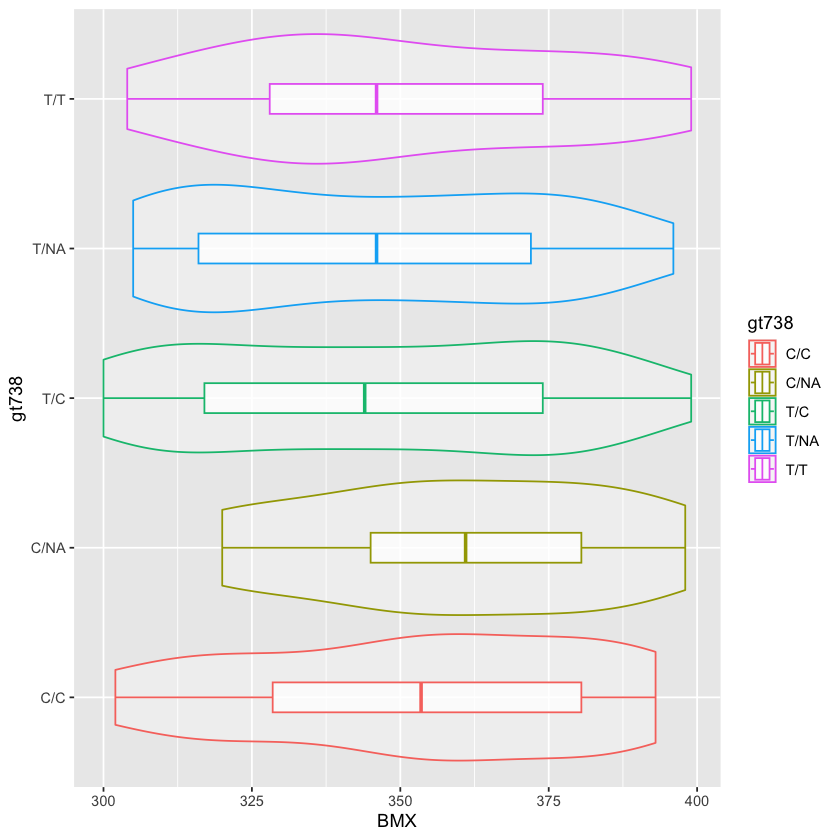

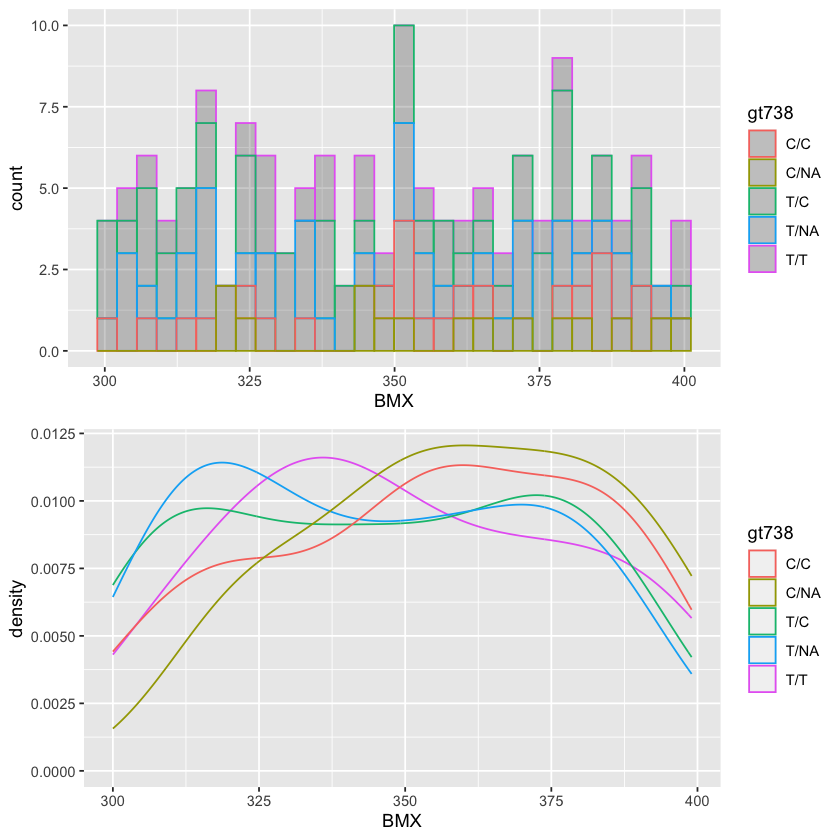

In [19]:
library(cowplot)

ggplot(newdat, aes(x=BMX, y=gt738, col=gt738)) +
  geom_violin(alpha = 0.3) +
  geom_boxplot(alpha = 0.7, width =0.2)

BMXhisto <- ggplot(newdat, aes(x = BMX, col = gt738)) +
  geom_histogram(alpha = 0.3)
               
BMXdens <- ggplot(newdat, aes(x=BMX, col = gt738)) +
  geom_density()

plot_grid(BMXhisto,BMXdens, nrow=2)

In [23]:
#Shapiro test for normality -
shapiro.test(newdat$BMX) #overall dataset

#And by genotype
newdat$gt738 <- gt738

by(newdat$BMX, newdat$gt738, shapiro.test)


	Shapiro-Wilk normality test

data:  newdat$BMX
W = 0.95073, p-value = 4.25e-05


newdat$gt738: C/C

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.93424, p-value = 0.1503

------------------------------------------------------------ 
newdat$gt738: C/NA

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.94579, p-value = 0.4607

------------------------------------------------------------ 
newdat$gt738: T/C

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.94054, p-value = 0.01553

------------------------------------------------------------ 
newdat$gt738: T/NA

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.93084, p-value = 0.02378

------------------------------------------------------------ 
newdat$gt738: T/T

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95405, p-value = 0.3087


Since multiple p<0.05 we *reject* the null hypothesis that the BMX distribution is normally distributed. 

So we **shouldn't** use parametric tests here.

Now use the **Kruskal-Wallis test** (non-parametric test to compare multiple (>2) different groups where the independent variable is categorical and the dependent variable is continuous).

In [21]:
kruskal.test(newdat$BMX ~ gt738)


	Kruskal-Wallis rank sum test

data:  newdat$BMX by gt738
Kruskal-Wallis chi-squared = 3.8923, df = 4, p-value = 0.4208


#### Since p = 0.4208 we *do not* reject the null hypothesis that there is no significant difference in distribution of BMX expression according to the genotype.

### <font color='red'> Perform a statistical test to identify if the expression of BRCA2 is affected by rs886040801 </font>

### As before - visualise first:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


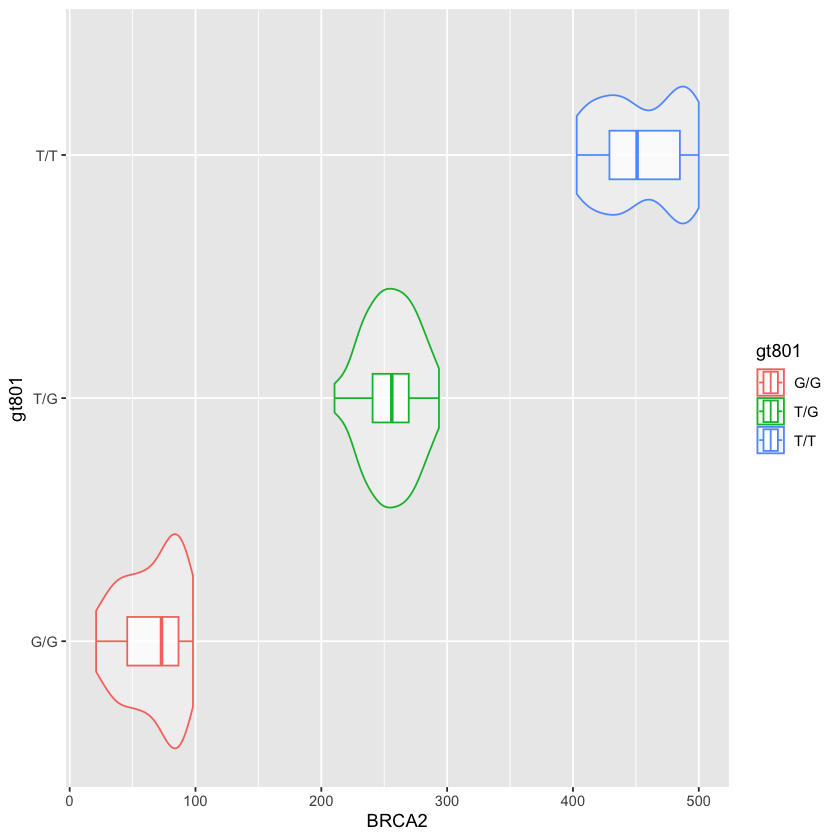

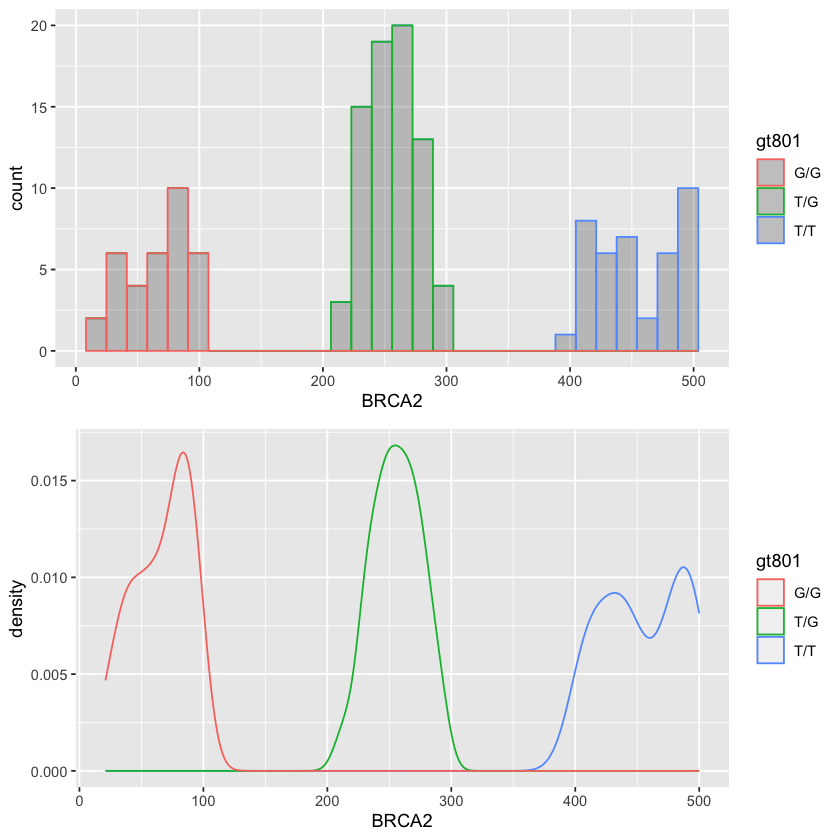

In [24]:
ggplot(newdat, aes(x=BRCA2, y=gt801, col=gt801)) +
  geom_violin(alpha = 0.3) +
  geom_boxplot(alpha = 0.7, width =0.2)

BRCA2histo <- ggplot(newdat, aes(x = BRCA2, col = gt801)) +
  geom_histogram(alpha = 0.3)

BRCA2dens <- ggplot(newdat, aes(x=BRCA2, col = gt801)) +
  geom_density()

plot_grid(BRCA2histo,BRCA2dens, nrow=2)

In [27]:
newdat$gt801 <- gt801 #makes a genotype column

#Shapiro test by genotype
by(newdat$BRCA2, newdat$gt801, shapiro.test)

newdat$gt801: G/G

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.92807, p-value = 0.02749

------------------------------------------------------------ 
newdat$gt801: T/G

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.9861, p-value = 0.5956

------------------------------------------------------------ 
newdat$gt801: T/T

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.90699, p-value = 0.003074


So again - p <0.05 so significantly different from normal distribution and should use non-parametric tests.

In [28]:
kruskal.test(newdat$BRCA2 ~ gt801)



	Kruskal-Wallis rank sum test

data:  newdat$BRCA2 by gt801
Kruskal-Wallis chi-squared = 123.95, df = 2, p-value < 2.2e-16


### Since p <0.05 - there is a significant difference in the expression of BRCA2 depending on the genotype. 

### <font color='red'> Perform a statistical test to identify if the expression of BMX affects the expression of BRCA2 </font>

Visualise first - coloured by *rs886040801* genotype since we have demonstrated already that this has a significant effect:

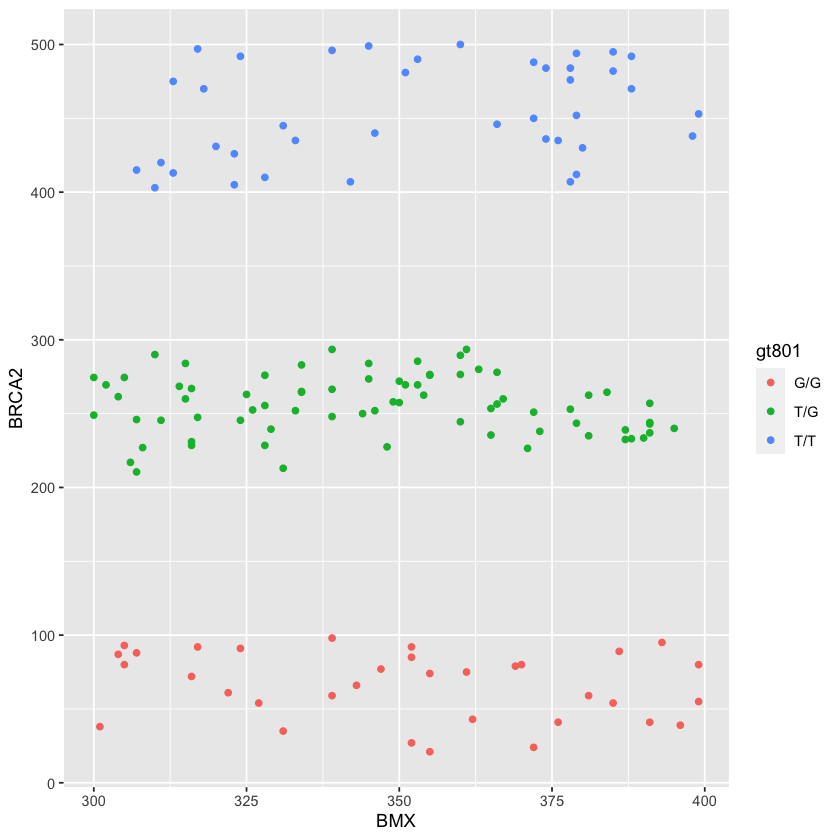

In [31]:
newdat %>% 
  ggplot(aes(x = BMX, y = BRCA2, colour = gt801)) +
  geom_point()

#### Then use linear models since the predictor and outcome are both continuous variables:

In [34]:
#Model 1 tries to explain BRCA2 expression based only on BMX
model1 <- lm(data=newdat[,c(1:6)], BRCA2~BMX)
summary(model1)

#Model 2 tries to explain BRCA2 expression based on all columns in the table
model2 <- lm(data=newdat[,c(1:6)], BRCA2~.)
summary(model2)



Call:
lm(formula = BRCA2 ~ BMX, data = newdat[, c(1:6)])

Residuals:
     Min       1Q   Median       3Q      Max 
-246.125  -41.231   -8.168  143.028  237.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 198.9023   140.0072   1.421    0.158
BMX           0.1915     0.3997   0.479    0.633

Residual standard error: 140.2 on 146 degrees of freedom
Multiple R-squared:  0.001569,	Adjusted R-squared:  -0.005269 
F-statistic: 0.2295 on 1 and 146 DF,  p-value: 0.6326



Call:
lm(formula = BRCA2 ~ ., data = newdat[, c(1:6)])

Residuals:
   Min     1Q Median     3Q    Max 
-52.02 -17.96   0.19  18.92  48.17 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      68.60752   26.59175   2.580   0.0109 *  
phenounaffected -13.83147   15.13679  -0.914   0.3624    
sexXY            -4.07142    8.27349  -0.492   0.6234    
rs738C/C         -6.88504    7.32951  -0.939   0.3492    
rs738C/T         -3.73574    6.78750  -0.550   0.5830    
rs738T            1.13780    7.92051   0.144   0.8860    
rs738T/C        -15.07548    7.79963  -1.933   0.0553 .  
rs738T/T               NA         NA      NA       NA    
rs801G/T        197.52738   14.95386  13.209   <2e-16 ***
rs801T/G        204.80450   15.26652  13.415   <2e-16 ***
rs801T/T        400.52665   15.36648  26.065   <2e-16 ***
BMX               0.01113    0.07270   0.153   0.8786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

### Model 1 (BRCA2 expression explained by BMX expression):
### p = 0.6326
So there is no significant effect of BMX expression on BRCA2 expression. 

### Model 2 (BRCA2 expression explained by all predictors in table):
### p < 2.2e-16 
So this model is statistically significant - and the predictors with p<0.001 are all *rs886040801* genotype as expected.

### <font color='red'> Concluding Paragraph </font>

The above analysis does not support an association between the BMX variant *rs139052738* and the clinical phenotype of familial cancer. This variant is not associated with BMX expression and so appears to be benign from the data here. 

The BRCA2 variant *rs886040801* was associated with the clinical phenotype of familial cancer. This variant was strongly associated with BRCA2 expression as evidenced by the multiple R-squared value in linear Model 2 which approached 1 suggesting that a large amount of variation in the data was explained by *rs886040801* genotype. 

The G/G genotype was associated with the lowest expression of the known tumour suppressor gene BRCA2, and the highest frequency of familial cancer. This supports the hypothesis that the *rs886040801* variant increases risk of familial cancer, and does so through reducing expression of the BRCA2 tumour suppressor gene.